# Finding the Best Markets to Advertise In
For this project, we will take the role working for an e-learning company.  We will be analyzing which two markets are the best to advertise in for the given e-learning company.  This company offers courses on programming, with most of the courses being on web and mobile development.  The company does also offer many other domains as well, such as data science, game development, etc.

The company is interested in investing money into advertising.  Our goal is to help them find the best markets to advertise their product in.

A great place to start would be to use existing data from surveys with new coders and see if we can narrow down some good markets.

The data we will use will be the 'freeCodeCamp's 2017 New Coder Survey'.  freeCodeCamp is a free e-learning platform for web development.  They also run a popular Medium publication where they deployed the survey for new coders with varying interests.  This will be helpful to find areas of interest for new coders and will help our e-learning company choose ideal up and coming markets to advertise in.

#### Getting familiar with the data
The data can be found [in this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

We'll begin by reading in the data and exploring it.

In [1]:
import pandas as pd
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
survey.shape

/Users/WordApparel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(18175, 136)

In [2]:
#There are 136 Columns so let's display them all
pd.options.display.max_columns = 136
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

#### Sample Representation
We're interested in finding coders that will be interested in the courses the e-learning company offers.  We'll want to make sure the sample is representative of the population we're trying to market to.  

If the sample is representative, we'd like to know where the coders are located, which locations have the greatest number of new coders, and how much each coder is willing to spend on learning.

First, let's start with marking sure the Job Role Interest column aligns with our goals.

In [3]:
survey['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                 11.770595
  Front-End Web Developer                                                                                                                 6.435927
  Data Scientist                                                                                                                          2.173913
Back-End Web Developer                                                                                                                    2.030892
  Mobile Developer                                                                                                                        1.673341
                                                                                                                                           ...    
  Front-End Web Developer,   Mobile Developer, Full-Stack Web Developer, Game Developer, Back-End Web Developer, Infor

Looking at the frequency distribution.  We can quickly see a few main takeaways:

- Web Development is a very popular interest, especially Full-Stack Web Development and Front-End Web Development.  

- We can also see that Data Science and Mobile Development also has interest, albeit a bit less.

- There seem to be quite a few people that are interested in more than one subject.

Since there are a lot of respondents that chose multiple areas of interest, we can split them to see which subjects once split are still the most popular.

In [4]:
#Split and add to dictionary all the roles
job_no_NaN = survey['JobRoleInterest'].dropna()
split = job_no_NaN.str.split(',')


In [5]:
job_role_dict = {}
for jobs in split:
   for job in jobs:
        if job in job_role_dict:
            job_role_dict[job] += 1
        else:
            job_role_dict[job] = 1

In [6]:
job_role_dict_df = pd.DataFrame.from_dict(job_role_dict, orient ='index')
job_role_dict_df.columns = ['Quantity']
job_role_dict_df['Percent'] = job_role_dict_df['Quantity'] / 236
job_role_dict_df.sort_values(by = 'Percent',ascending=False)

,Quantity,Percent
Full-Stack Web Developer,2490,10.550847
Front-End Web Developer,2287,9.690678
Back-End Web Developer,1997,8.461864
Mobile Developer,1734,7.347458
Full-Stack Web Developer,1708,7.237288
...,...,...
Pharmacy tech,1,0.004237
data journalist / data visualist,1,0.004237
Desings,1,0.004237
Infrastructure Architect,1,0.004237


From this we can see that Web Development still takes up the top 3 positions.  Also importantly mobile devlopment, game development, and Data Science are all in the top 10.

#### Multiple subject interests
Next it will be interesting to see how many people are only interested in one subject vs multiple different subjects.  This will help us understand how many students have a clear idea of what fields they are interested in.

In [7]:
no_subjects = split.apply(lambda x: len(x))
no_subjects.value_counts(normalize=True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

We can see that only 31.7% of all coders have a very distinct idea of what type of programming they are interested in.  This may benefit our e-learning company given they offer a diverse range of courses.

The primary focus of our e-learning company is mobile and web development, so we should see what the overall interest is in those two fields.

In [8]:
web_or_mobile = job_no_NaN.str.contains('Web Developer|Mobile Developer')
web_or_mobile_freq = web_or_mobile.value_counts(normalize=True)*100
web_or_mobile_freq

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

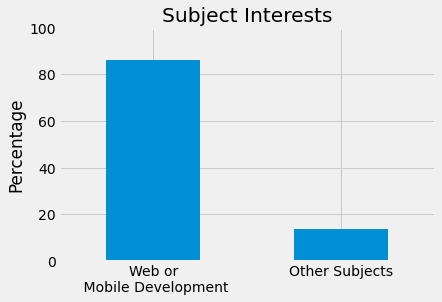

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
web_or_mobile_freq.plot.bar()
plt.title('Subject Interests')
plt.xticks([0,1],['Web or\n Mobile Development','Other Subjects'], rotation = 0)
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()

As we can see 86% of all subject interests are in either Web or Mobile development.  Given that the e-learning company focuses on both of these in their courses, this is a strong indication that this is a very good sample representation for our population of interest.

Now we can begin analyzing our initial goal of:

- Where the coders are located

- Which locations have the greatest number of new coders

- How much each coder is willing to spend on learning.

# Locations of New Coders
We can think of each country as an individual market.  It will be helpful to find which countries offers us the best potential market.  We'll focus on countries that offer the highest density so we can reach a broader range of potential coders.

Since we're interested in only potential customers that are representative of our population, we'll only use survey respondents who answered based on job interest

In [10]:
survey_not_null = survey[survey['JobRoleInterest'].notnull()]
rel_freq = survey_not_null['CountryLive'].value_counts(normalize=True)*100
abs_freq = survey_not_null['CountryLive'].value_counts()
pd.DataFrame(data = {'Relative Frequency':rel_freq,
                    'Absolute Frequency':abs_freq})

,Relative Frequency,Absolute Frequency
United States of America,45.700497,3125
India,7.721556,528
United Kingdom,4.606610,315
Canada,3.802281,260
Poland,1.915765,131
...,...,...
Guadeloupe,0.014624,1
Trinidad & Tobago,0.014624,1
Qatar,0.014624,1
Anguilla,0.014624,1


We can see that the United States dominates the potential customer base at 45.7 percent.  Next would be India, but it's not too far away from the UK and Canada.

Given this, although United States seems to be the best option, we need to make sure people are willing to spend money on courses and not just want free courses.

#### Willingness to spend for learning
Since the e-learning company sells subscriptions at $59 a month, we'll want to find potential customers who are willing to spend at least this amount.  

We'll narrow our analysis down to four countries, US, India, UK, and Canada.  These four countries had the highest Absolute Frequency so we'll have a good amount of data for each.  Also, our e-learning company only has courses in English, so it's best to focus on countries where English is one of the primary languages.  This will help the ads target the right people.

Let's begin by finding the amount each student has spent each month since they began programming.



In [11]:
#Replace 0 with 1 for months programming to avoid division errors
survey_not_null['MonthsProgramming'].replace(0,1,inplace=True)
survey_not_null['money_month'] = survey_not_null['MoneyForLearning'] / survey_not_null['MonthsProgramming']
survey_not_null['money_month'].isnull().sum()

/Users/WordApparel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-11-b829b33d5e3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_not_null['money_month'] = survey_not_null['MoneyForLearning'] / survey_not_null['MonthsProgramming']


675

In [12]:
#Keep the data that doesn't contain null values for money per month
survey_not_null = survey_not_null[survey_not_null['money_month'].notnull()]
#Keep the data that doesn't contain null values for Country
survey_not_null = survey_not_null[survey_not_null['CountryLive'].notnull()]

Now that we have all relevant data for our analysis and removed any null values in the categories we're interested in, we can begin analyzing.

Let's first make sure after removing the null values that we still have enough data to work with.

In [13]:
survey_not_null['CountryLive'].value_counts().head(4)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

For the four countries we're interested, that seems to be enough data to work with.  

Let's now group the data on country to see how much on average each student pays per month for learning.

In [14]:
countries_grouped = survey_not_null.groupby('CountryLive').mean()
countries_grouped['money_month'][['United States of America',
                                 'India',
                                 'United Kingdom',
                                 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_month, dtype: float64

We can see that the United States has the highest, but what is suprising is that India is the second highest with the UK being pretty far off.  Considering socio-economical metrics like GDP per capita, we'd expect people in UK and Canada to spend more than India.

Maybe there isn't enough representative data or we possibily have some extreme outliers skewing the data.  There is also a chance it's correct.

Let's investigate further with box plots to look for outliers.

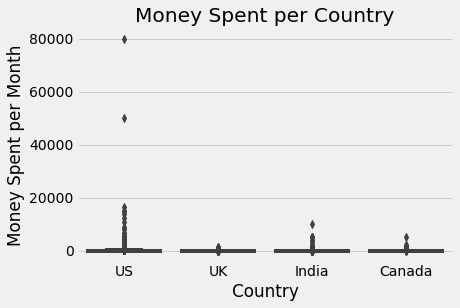

In [15]:
#Filter Data on our four countires of interest
import seaborn as sns
top_four = survey_not_null[survey_not_null['CountryLive'].str.contains(
'United States of America|India|United Kingdom|Canada')]
#box plots
sns.boxplot(y ='money_month',x = 'CountryLive', data = top_four)
plt.title('Money Spent per Country')
plt.ylabel('Money Spent per Month')
plt.xlabel('Country')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

We can immediately see that the United States has 2 extreme outliers around 50,000 and 80,000.  That seems like an absurd amount of money spent in a month and more than likely is a mistake.  Let's remove those and redo the means and plots.

In [16]:
survey_not_null = survey_not_null[survey_not_null['money_month'] < 20000]
countries_grouped = survey_not_null.groupby('CountryLive').mean()
countries_grouped['money_month'][['United States of America',
                                 'India',
                                 'United Kingdom',
                                 'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_month, dtype: float64

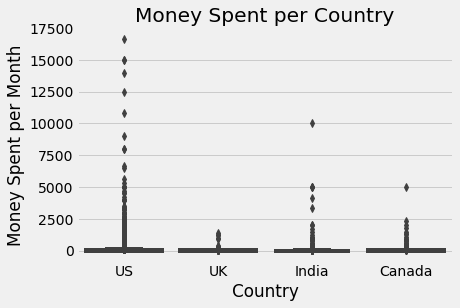

In [17]:
#Filter Data on our four countires of interest
top_four = survey_not_null[survey_not_null['CountryLive'].str.contains(
'United States of America|India|United Kingdom|Canada')]
#box plots
sns.boxplot(y ='money_month',x = 'CountryLive', data = top_four)
plt.title('Money Spent per Country')
plt.ylabel('Money Spent per Month')
plt.xlabel('Country')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

Since we were able to elimate the major outliers in the United States, we can now see some outliers in India.  It seems that over $2,500 will be a good place to explore to see if we can reach any conclusions.

Bootcamps seem to be pretty expensive per month, especially if the student is in multiple boot camps.  We can look for that.

In [18]:
india_outliers = top_four[
    (top_four['CountryLive'] == 'India') &
    (top_four['money_month'] >= 2500)
]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,...,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,...,in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,...,no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 milli

Given that none of the participants marked that they attended a bootcamp, we can make an educated assumption that they misunderstood the question and put potentially a university tuition as well.  Let's remove those outliers.

In [19]:
top_four = top_four.drop(india_outliers.index)

The box plot above also showed more outliers in the United States above $6,000.  Let's explore those.

In [20]:
us_outliers = top_four[
    (top_four['CountryLive'] == 'United States of America') &
(top_four['money_month'] > 6000)
]
us_outliers[['AttendedBootcamp','MonthsProgramming','money_month']]

,AttendedBootcamp,MonthsProgramming,money_month
718,1.0,1.0,8000.000000
1222,1.0,2.0,6500.000000
3184,1.0,1.0,9000.000000
3930,0.0,6.0,10833.333333
6805,1.0,1.0,15000.000000
7198,0.0,5.0,14000.000000
7505,1.0,3.0,6666.666667
9778,1.0,1.0,8000.000000
16650,0.0,12.0,16666.666667
16997,0.0,1.0,12500.000000


Taking a look at the outliers, we can see that of the ones who attended bootcamp, none of them had more than 3 months of programming so the money spent will be skewed if they paid upfront.  We can safely drop all the outliers.

In [21]:
top_four = top_four.drop(us_outliers.index)

Let's take a look at Canada now.

In [22]:
canada_outliers = top_four[
    (top_four['CountryLive'] == 'Canada') &
(top_four['money_month'] > 4500)]
canada_outliers[['AttendedBootcamp','MonthsProgramming']]

,AttendedBootcamp,MonthsProgramming
13659,1.0,2.0


Similar to United States, less than 3 months programming.  We can safely drop this one as well.

In [23]:
top_four = top_four.drop(canada_outliers.index)

In [24]:
top_four.groupby('CountryLive').mean()['money_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_month, dtype: float64

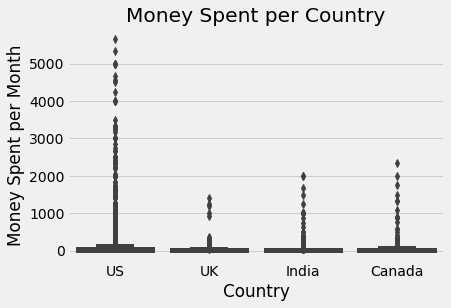

In [25]:
sns.boxplot(x = 'CountryLive', y = 'money_month', data=top_four)
plt.title('Money Spent per Country')
plt.ylabel('Money Spent per Month')
plt.xlabel('Country')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

With removing the outliers, it's still very clear that the United States is the best market to advertise in.  There are a lot of coders who are interesting in learning and are willing to pay a good amount for it.

However, we need to find an additional country to advertise in.  Before the outliers were removed, India seemed like the clear second choice.  However, now it seems to be a toss up between Canada and India.  We should take into consideration the distribution of the potential students given our data.  

Let's take a look again at the frequency distribtuion.

In [26]:
top_four['CountryLive'].value_counts(normalize=True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

It's still not completely clear, but given that the respondents were almost double in India vs Canada.  India may be a better shot.

To help investigate further the best bang for our buck with our marketing budget.  We can take a look at a couple different parameters for each country to see if we can target specific groups from each country with advertisments.

Both employment status and school degree could be great indicators.  Typically these show up on someones social media page and can be an easy way to target.

#### Checking employment status and school degrees
Let's compare our top 3 choices.  India, Canada, and United States.  We can allocate our budget accordingly.

In [27]:
top_four[top_four['CountryLive'] == 'India'].groupby(['EmploymentStatus']).mean()['money_month']

EmploymentStatus
A stay-at-home parent or homemaker        2.083333
Doing an unpaid internship               45.242890
Employed for wages                      163.019127
Not working and not looking for work     21.502723
Not working but looking for work         60.816991
Self-employed business owner             96.875000
Self-employed freelancer                 20.070243
Unable to work                           32.236332
Name: money_month, dtype: float64

In [28]:
top_four[top_four['CountryLive'] == 'India'].groupby(['SchoolDegree']).mean()['money_month']

SchoolDegree
associate's degree                           44.404762
bachelor's degree                            95.499765
high school diploma or equivalent (GED)      24.520871
master's degree (non-professional)          239.791667
no high school (secondary school)             2.000000
professional degree (MBA, MD, JD, etc.)      44.013126
some college credit, no degree               68.269324
some high school                              6.723325
trade, technical, or vocational training      0.000000
Name: money_month, dtype: float64

For India, when it comes to employment status, it seems that those who are employed, looking for a job, or business owners may be good targets.  For school degrees, focusing on Bachelor's and Master's seem to be the best bet.

In [29]:
top_four[top_four['CountryLive'] == 'Canada'].groupby(['EmploymentStatus']).mean()['money_month']

EmploymentStatus
A stay-at-home parent or homemaker       40.000000
Doing an unpaid internship                0.000000
Employed for wages                       80.124544
Military                                277.777778
Not working and not looking for work      6.108569
Not working but looking for work        134.714315
Retired                                  11.111111
Self-employed business owner             62.500000
Self-employed freelancer                107.465278
Unable to work                           60.208333
Name: money_month, dtype: float64

In [30]:
top_four[top_four['CountryLive'] == 'Canada'].groupby(['SchoolDegree']).mean()['money_month']

SchoolDegree
Ph.D.                                        43.333333
associate's degree                          219.197531
bachelor's degree                            96.549494
high school diploma or equivalent (GED)      36.988889
master's degree (non-professional)          107.106031
no high school (secondary school)             0.666667
professional degree (MBA, MD, JD, etc.)      56.349206
some college credit, no degree              136.816840
some high school                              5.003151
trade, technical, or vocational training    199.683333
Name: money_month, dtype: float64

Surprisngly, Canada sems to be a bit different.  For employment, Military is by far the highest, with those looking for a job, freelancers, and employed following.   When it comes to school degrees, the Highest are Associates/Some College Credit and Trade School.  

In [31]:
top_four[top_four['CountryLive'] == 'United States of America'].groupby(['EmploymentStatus']).mean()['money_month']

EmploymentStatus
A stay-at-home parent or homemaker       29.759738
Doing an unpaid internship              220.314663
Employed for wages                       97.580545
Military                                 16.984127
Not working and not looking for work    140.025788
Not working but looking for work        266.475728
Retired                                   4.166667
Self-employed business owner            174.931187
Self-employed freelancer                168.600975
Unable to work                           52.022693
Name: money_month, dtype: float64

In [32]:
top_four[top_four['CountryLive'] == 'United States of America'].groupby(['SchoolDegree']).mean()['money_month']

SchoolDegree
Ph.D.                                       271.873810
associate's degree                          115.875601
bachelor's degree                           195.449379
high school diploma or equivalent (GED)      65.519336
master's degree (non-professional)          174.360140
no high school (secondary school)            19.730888
professional degree (MBA, MD, JD, etc.)     140.515713
some college credit, no degree               99.949623
some high school                             60.580144
trade, technical, or vocational training    185.171510
Name: money_month, dtype: float64

For the United States, it seems that anyone who is employed, besides Military may be a good market to advertise to.  Same goes for school, anyone with a degree of some kind is a good market.

# Conclusion
Ultimately it seems that our best bet might be to allocate our marketing budget to three different countries.  United States, India, and Canada.  However, for each one, we should allocate overall funds and utilize targeting based on Schooling and Employment Status.  

For United States, our highest budget, as long as they have some schooling, employed, or looking for a job, they're a great market.

In India, focusing on only Bachelors and Masters, as well as an employed individuals, those looking for a job, or business owners are good targets.

In Canada, Military is a very potential lucrative market to focus on, as well as those looking for a job, freelancers, and the employed.  Also, anyone with any College education or Trade School.

Advertising in each of these three countries and choosing different targeted groups will be the best use of budget.